### Thinking1
奇异值分解SVD的原理是怎样的，都有哪些应用场景

答：SVD的原理是将矩阵$A$分解为三个矩阵相乘，即$$A_{m\times n} = P_{m\times m}\Lambda_{m\times n} Q^T_{n\times n}$$  
&emsp;&emsp;其中，特征值矩阵$\Lambda$为对角阵，其对角线元素$\lambda_1 \geq \lambda_2... \geq \lambda_s (s=min(m,n))$  
&emsp;&emsp;取$k \ll min(m,n)$，取特征值矩阵的前$k$个特征值，得到新的特征矩阵$\Lambda'_{k\times k}$，并取$P,Q$的前$k$列得到矩阵$U,V$，从而通过下式得到新的矩阵$A'_{m\times n}$
$$A'_{m\times n} = U_{m\times k}\Lambda'_{k\times k} Q^T_{k\times n}$$  
应用场景：  
（1）对图片进行压缩  
（2）对数据进行降维

### Thinking2
funkSVD, BiasSVD，SVD++算法之间的区别是怎样的

答：funkSVD考虑了评分矩阵，用户矩阵和商品矩阵，并加上了正则化项；BiasSVD则在funkSVD的基础上考虑了系统整体的评分水平，用户个体相对于用户整体的偏差以及单个商品相对于商品整体的偏差；SVD++则在BiasSVD的基础上加入了对于用户对商品隐式行为的考量。

### Thinking3
矩阵分解算法在推荐系统中有哪些应用场景，存在哪些不足

答：矩阵分解通过将高维的用户-商品矩阵分解为两个低维矩阵：用户矩阵和商品矩阵，来对用户的评分进行预测，进而利用预测结果来进行推荐。  
存在的不足：  
（1）存在冷启动问题，不适用于新用户、新商品  
（2）只考虑了用户-商品两个维度，还有很多其他可以利用的信息（如顾客的基本信息，商品的基本信息）没有被使用到

### Thinking4
假设一个小说网站，有N部小说，每部小说都有摘要描述。如何针对该网站制定基于内容的推荐系统，即用户看了某部小说后，推荐其他相关的小说。原理和步骤是怎样的

答：原理：从描述中抽取特征，对于指定小说，比对其与其他各部小说的相似度，推荐相似度前几名的小说。  
步骤：  
（1）对小说的描述进行分词  
（2）计算词频，并生成对应的TF-IDF矩阵  
（3）计算出余弦相似度矩阵  
（4）对于指定小说，可以在其对应的行里找到相似度的前几名进行推荐

### Thinking5
Word2Vec的应用场景有哪些

答：在NLP中：  
（1）查找相关词  
（2）根据上下文预测缺失词  
（3）机器翻译  
（4）语句生成  

在推荐系统中：   
（1）商品推荐：每个商品就是一个词，选定一种行为，每个用户按照其对商品产生该行为的顺序形成一篇文章，从而利用Word2Vec可以计算商品相似度，向用户进行商品推荐。  
（1）社交网路中的推荐：将每一个大V作为一个词，每个用户按照其关注大V的顺序形成一篇文章，从而利用Word2Vec可以计算大V之间的相似度，向用户推荐他可能感兴趣的大V。  

### Action1
选择任意一张图片，对其进行灰度化，然后使用SVD进行图像的重构，当奇异值数量为原有的1%，10%，50%时，输出重构后的图像

In [60]:
import numpy as np
from PIL import Image
image = Image.open('./image0.jpg')
A = np.array(image)
A.shape

(417, 500, 3)

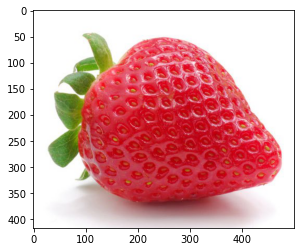

In [61]:
import matplotlib.pyplot as plt
plt.imshow(A)
plt.show()

当奇异值数量为原有的1%时:


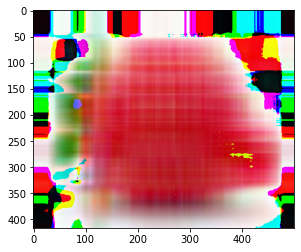

当奇异值数量为原有的10%时:


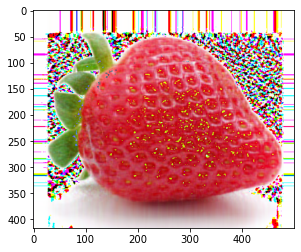

当奇异值数量为原有的50%时:


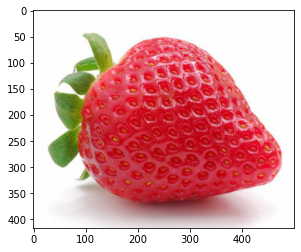

In [62]:
def get_image_feature(A, ratio):
    from scipy.linalg import svd
    import copy
    a = copy.deepcopy(A)
    k = int(min(a.shape[:2])*ratio)
    for i in range(a.shape[2]):
        p,s,q = svd(a[:,:,i], full_matrices=False)
        s_temp = np.zeros(s.shape[0])
        s_temp[0:k] = s[0:k]
        s = s_temp*np.identity(s.shape[0])
        temp = np.dot(p,s)
        temp = np.dot(temp,q)
        a[:,:,i] = temp
    plt.imshow(a)
    plt.show()

print('当奇异值数量为原有的1%时:')
get_image_feature(A, 0.01)
print('当奇异值数量为原有的10%时:')
get_image_feature(A, 0.1)
print('当奇异值数量为原有的50%时:')
get_image_feature(A, 1)

### Action2
使用Google Colab编辑器，对MovieLens数据集进行评分预测，计算RMSE（使用funkSVD, BiasSVD，SVD++）

#### Part1
注：以下部分只是试着调一下包，对于Google Colab的使用详见homework2_action2.ipynb

In [70]:
# 调包
from surprise import Reader
from surprise import Dataset
from surprise import SVD, SVDpp
from surprise.model_selection import cross_validate

# 加载数据
reader = Reader(line_format = 'user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file('ratings.csv', reader=reader)

In [71]:
# SVD++
print('对于SVD++：')
svdpp = SVDpp()
cross_validate(svdpp, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

对于SVD++：
Evaluating RMSE, MAE of algorithm SVDpp on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.8328  0.8288  0.8293  0.8303  0.0018  
MAE (testset)     0.6345  0.6318  0.6315  0.6326  0.0013  
Fit time          2223.00 2230.02 2209.10 2220.71 8.69    
Test time         80.13   81.19   80.86   80.72   0.44    


{'test_rmse': array([0.83275451, 0.82881427, 0.82928397]),
 'test_mae': array([0.6344896 , 0.6317826 , 0.63154857]),
 'fit_time': (2222.9976530075073, 2230.0169734954834, 2209.1048052310944),
 'test_time': (80.13057661056519, 81.18705296516418, 80.8566792011261)}

#### Part2
使用Spark

In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [2]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
# sc = SparkContext()
spark = SparkSession(sc).builder.master("local").appName("movie_ratings").getOrCreate()

In [3]:
df = spark.read.options(header='True', inferSchema='True', delimiter=',').csv(path="ratings.csv", header=True)
df = df.drop('timestamp')
df.printSchema()
df.show(5)

root
 |-- userId: integer (nullable = true)
 |-- movieId: integer (nullable = true)
 |-- rating: double (nullable = true)

+------+-------+------+
|userId|movieId|rating|
+------+-------+------+
|     1|      2|   3.5|
|     1|     29|   3.5|
|     1|     32|   3.5|
|     1|     47|   3.5|
|     1|     50|   3.5|
+------+-------+------+
only showing top 5 rows



In [4]:
from pyspark.ml.recommendation import ALS

# 创建ALS模型
als = ALS(rank=10, maxIter = 10, regParam=0.1, userCol= 'userId', itemCol='movieId', ratingCol='rating')
print('参数说明：')
print(als.explainParams())
model = als.fit(df)

参数说明：
alpha: alpha for implicit preference (default: 1.0)
checkpointInterval: set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext. (default: 10)
coldStartStrategy: strategy for dealing with unknown or new users/items at prediction time. This may be useful in cross-validation or production scenarios, for handling user/item ids the model has not seen in the training data. Supported values: 'nan', 'drop'. (default: nan)
finalStorageLevel: StorageLevel for ALS model factors. (default: MEMORY_AND_DISK)
implicitPrefs: whether to use implicit preference (default: False)
intermediateStorageLevel: StorageLevel for intermediate datasets. Cannot be 'NONE'. (default: MEMORY_AND_DISK)
itemCol: column name for item ids. Ids must be within the integer value range. (default: item, current: movieId)
maxIter: max number of iterations

In [11]:
# 对指定用户进行TopN推荐
def topN(uid, n):
    rs = model.recommendForAllUsers(n)
    print('对于用户%s,Top-%d推荐如下：' % (str(uid),n))
    row = rs[rs.userId == uid].collect()[0]
    for i in row['recommendations']:
        print('电影%s,预测评分为%f' % (i.movieId,i.rating))

topN(196,5)

对于用户196,Top-5推荐如下：
电影95776,预测评分为5.565016
电影5911,预测评分为5.508458
电影5251,预测评分为5.320166
电影79987,预测评分为5.309850
电影82931,预测评分为5.265891


In [7]:
# 模型评估
from pyspark.ml.evaluation import RegressionEvaluator
pred = model.transform(df)
pred.show(5)

+------+-------+------+----------+
|userId|movieId|rating|prediction|
+------+-------+------+----------+
|  1259|    148|   5.0| 3.5992289|
|  5585|    148|   3.0| 3.2434254|
|  3990|    148|   4.0| 2.3119383|
|  3673|    148|   2.0| 2.2944167|
|   603|    148|   2.0|  2.395607|
+------+-------+------+----------+
only showing top 5 rows



In [10]:
evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction")
rmse = evaluator.evaluate(pred)
print('RMSE为：', rmse)

RMSE为： 0.7519514457796039


### Action3
使用Gensim中的Word2Vec对三国演义进行Word Embedding，分析和曹操最相近的词有哪些，曹操+刘备-张飞=?
数据集：three_kingdoms.txt

In [7]:
# 数据探索
import jieba
import os
with open('./three_kingdoms/source/three_kingdoms.txt', 'rb') as f:
    doc = f.read()
doc_cut = jieba.cut(doc)
list(doc_cut)[:20]

['三国演义',
 '\r\n',
 '作者',
 '：',
 '罗贯中',
 '\r\n',
 '\r\n',
 '正文',
 ' ',
 '第一回',
 ' ',
 '宴',
 '桃园',
 '豪杰',
 '三',
 '结义',
 ' ',
 '斩',
 '黄巾',
 '英雄']

In [13]:
# 源文件目录
source_folder = './three_kingdoms/source'
segment_folder = './three_kingdoms/segment'

# 对source中的每一个文件进行字词分割
def segment_lines(files_list, source_dir, seg_dir, stopwords=[]):
    for i,file in files_list:
        seg_name = os.path.join(seg_dir, 'segment_{}.txt'.format(i))
        file_name = os.path.join(source_dir, file)
        with open(file_name, 'rb') as f1:
            doc = f1.read()
        doc_cut = jieba.cut(doc)
        sentence_seg = []
        for word in doc_cut:
            if word not in stopwords:
                sentence_seg.append(word)
        result = ' '.join(sentence_seg)
        result = result.encode('utf-8')
        with open(seg_name, 'wb') as f2:
            f2.write(result)

def get_files_list(file_dir):
    files_list=[]
    for files in os.listdir(file_dir):
        if os.path.splitext(files)[1] == '.txt':
            files_list.append(files)
    return enumerate(files_list)
files_list = get_files_list(source_folder)
segment_lines(files_list, source_folder, segment_folder)

In [20]:
from gensim.models import word2vec

# 加载句子
sentences = word2vec.PathLineSentences(segment_folder)
list(sentences)[:5]

[['三国演义'],
 ['作者', '：', '罗贯中'],
 ['正文', '第一回', '宴', '桃园', '豪杰', '三', '结义', '斩', '黄巾', '英雄', '首', '立功'],
 ['滚滚', '长江', '东', '逝水', '，', '浪花', '淘尽', '英雄', '。', '是非成败', '转头', '空', '。'],
 ['青山', '依旧', '在', '，', '几度', '夕阳红', '。', '白发', '渔樵', '江渚上', '，', '惯']]

In [29]:
import multiprocessing
# 设置模型参数进行训练
model1 = word2vec.Word2Vec(sentences, size=100, window=3, min_count=1)
model2 = word2vec.Word2Vec(sentences, size=128, window=5, min_count=5, workers=multiprocessing.cpu_count())

对于model1：
刘备和张飞的相似度： 0.95677066


In [34]:
print('对于model1：')
print('刘备和张飞的相似度：', model1.wv.similarity('刘备', '张飞'))
print('曹操最相近的词有：')
print(model1.wv.most_similar('曹操'))
print('曹操+刘备-张飞=')
print(model1.wv.most_similar(positive=['曹操', '刘备'], negative=['张飞']))

对于model1：
刘备和张飞的相似度： 0.95677066
曹操最相近的词有：
[('虑', 0.9916626214981079), ('孙权', 0.9914516806602478), ('汝兄', 0.9909859299659729), ('回报', 0.9905747175216675), ('已', 0.9904484748840332), ('哥哥', 0.9897679090499878), ('孔明', 0.9893299341201782), ('沮授', 0.9892550110816956), ('唤入', 0.9891624450683594), ('看毕', 0.9891499280929565)]
曹操+刘备-张飞=
[('扬鞭', 0.9952421188354492), ('丞相', 0.9945658445358276), ('大叫', 0.9944721460342407), ('某', 0.9940648078918457), ('臣', 0.9936215877532959), ('既', 0.9931731820106506), ('卿', 0.9927662014961243), ('琦', 0.992557942867279), ('商议', 0.9921361207962036), ('今', 0.9918790459632874)]


In [35]:
print('对于model2：')
print('刘备和张飞的相似度：', model2.wv.similarity('刘备', '张飞'))
print('曹操最相近的词有：')
print(model2.wv.most_similar('曹操'))
print('曹操+刘备-张飞=')
print(model2.wv.most_similar(positive=['曹操', '刘备'], negative=['张飞']))

对于model2：
刘备和张飞的相似度： 0.43568796
曹操最相近的词有：
[('先主', 0.9868330955505371), ('孙权', 0.9859204888343811), ('关公', 0.9837356209754944), ('书', 0.9826735258102417), ('缘何', 0.9822717905044556), ('拜谢', 0.9792687296867371), ('众将', 0.9785815477371216), ('叫', 0.9783129692077637), ('定', 0.9781279563903809), ('大惊', 0.9781171679496765)]
曹操+刘备-张飞=
[('丞相', 0.9868975877761841), ('吾', 0.9864521622657776), ('叹', 0.9859653115272522), ('臣', 0.9840146899223328), ('今', 0.9829882383346558), ('陛下', 0.9796746969223022), ('出此', 0.9790074825286865), ('朕', 0.9768975973129272), ('谁', 0.9766356945037842), ('非', 0.9765565395355225)]
